
# Ungraded Lab: MNIST Autoencoder

You will now work on an autoencoder that works on the MNIST dataset. This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.

https://github.com/sasidhar-programmer/Tensorflow_Advance_Techniques/blob/main/4-Generative-deeplearning-with-tensorflow/week-2/C4_W2_Lab_2_MNIST_Autoencoder.ipynb

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [2]:


def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image



In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()


In [5]:
def simple_autoencoder(inputs):
    '''builds the encoder and decoder'''
    encoder = Dense(units=32, activation='relu')(inputs)
    decoder = Dense(units=784, activation='sigmoid')(encoder)
    return encoder, decoder


inputs = Input(shape=(784,))
encoder_output, decoder_output = simple_autoencoder(inputs)
# setup an encoder model becuase we'll visualize its output later
encoder_model = Model(inputs=inputs, outputs=encoder_output)

autoencoder_model = Model(inputs=inputs, outputs=decoder_output)


In [9]:


# You will setup the model for training.
# You can use binary crossentropy to measure the loss between pixel values that
# range from 0 (black) to 1 (white).

autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

In [10]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history= autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 4s 5ms/step - loss: 0.2298
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1428
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1195
Epoch 4/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1075
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 0.1008
Epoch 6/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0974
Epoch 7/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0957
Epoch 8/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0949
Epoch 9/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0944
Epoch 10/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0940
Epoch 11/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0938
Epoch 12/50
468/468 [==============================] - 2s 4ms/step - loss: 0.0936
Epoch 13/50
468/468 [====

In [32]:
# visualize results

def display_one_row(disp_images, offset, shape=(28,28)):
    '''Display sample output in one row'''
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_images = np.reshape(test_image, shape)
        plt.imshow(test_images, cmap="gray")

def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
    '''Displays the input, encoded and decoded output values. '''
    plt.figure(figsize=(15, 15), facecolor="white")
    print('input images')
    display_one_row(disp_input_images, 0, shape=(28,28,))
    print('encoded')
    display_one_row(disp_encoded, 10, shape=enc_shape)
    print('decoded')
    display_one_row(disp_predicted, 20, shape=(28,28,))

input images
encoded
decoded


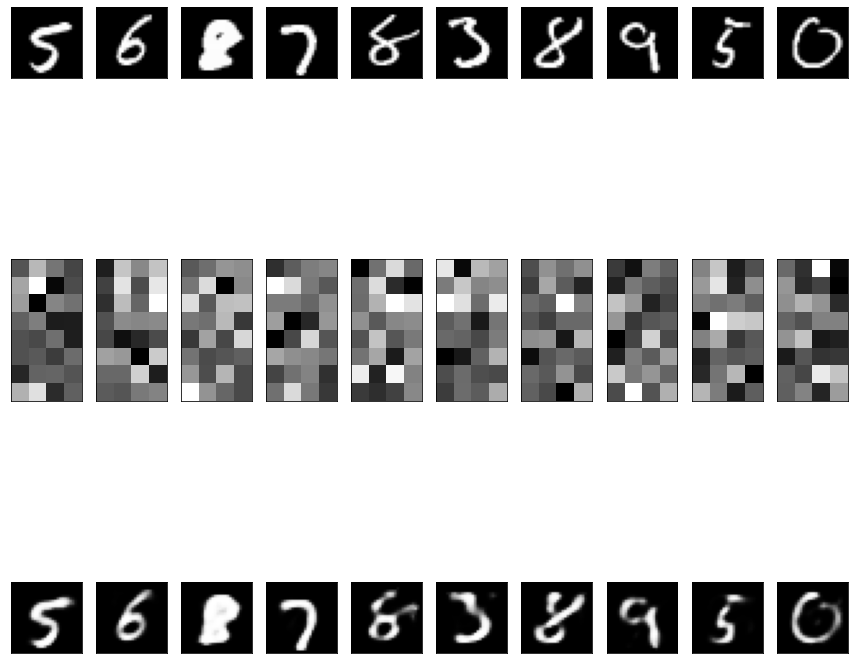

In [33]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])